***************************************************

**Definitions and Imports:**

In [1]:
####################################
## DO NOT EDIT THIS CODE SECTION
import numpy as np
from matplotlib import pyplot as plt
from scipy.io.wavfile import read, write
from scipy.signal import lfilter
from IPython.display import Audio
from IPython.display import display
from math import pi
%matplotlib widget
####################################

**Useful functions:**

In [2]:
####################################
## DO NOT EDIT THIS CODE SECTION
def read_wav_file(filename: str) -> (int, np.ndarray):
    Fs, signal = read(filename)
    signal = signal.astype(dtype=np.float32)
    signal = signal/(2**15)
    return Fs, signal

def plot_spectrogram(signal: np.ndarray, winlen: int, ovp: float, sampling_freq: int):
    fig = plt.figure()
    
    ax1 = plt.subplot2grid(shape=(3,1), loc=(0,0))
    x = np.arange(0, signal.size)/sampling_freq
    y_range = np.max(signal)-np.min(signal)
    ax1.plot(x,signal)
    plt.axis([x[0], x[x.size-1], np.min(signal)-0.1*y_range, np.max(signal)+0.1*y_range])
    plt.title('Time domain signal')
    plt.xlabel('Time [Sec]')
    plt.ylabel('Amplitude [Volt]')
    
    ax2 = plt.subplot2grid(shape=(3,1), loc=(1,0), rowspan=2)
    spectrum, freqs, times, im = ax2.specgram(signal, NFFT=winlen, Fs=sampling_freq, window=np.hamming(winlen), noverlap=int(np.floor(ovp*winlen)), scale='dB', cmap='hot', vmin=-100)
    plt.xlabel('Time [Sec]')
    plt.ylabel('Frequency [Hz]')
    plt.title(f'Spectrogram (FFT length {winlen}, overlap {round(100*ovp,2)}%)');
    
    plt.tight_layout()
    plt.show()
    print(f'The size of the spectrogram is {freqs.size}X{times.size}')
    
def basic_plot(x, y, xlabel='', ylabel='', title='', grid=True):
    fig = plt.figure()
    line, = plt.plot(x, y)
    y_range = np.max(y)-np.min(y)
    plt.axis([x[0], x[x.size-1], np.min(y)-0.1*y_range, np.max(y)+0.1*y_range])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if(grid):
        plt.grid()
    plt.title(title)
    plt.locator_params(axis='x',tight='true')
####################################

************************************************************

## Question 1 - A

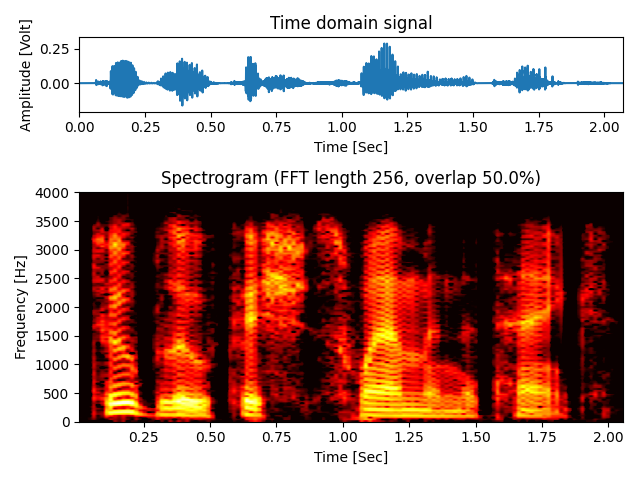

The size of the spectrogram is 129X128


In [3]:
id_digit = 5 # insert your ID digit

speechfilename =  '../SpeechSignalFiles/speech'+str(id_digit)+'.wav'
Fs, signal = read_wav_file(speechfilename)

plot_spectrogram(signal, 256, 0.5, Fs)

## Question 1 - D

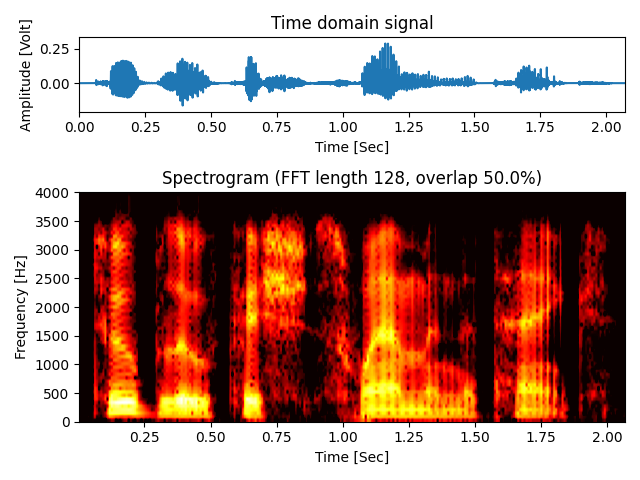

The size of the spectrogram is 65X258


In [4]:
plot_spectrogram(signal, 128, 0.5, Fs)

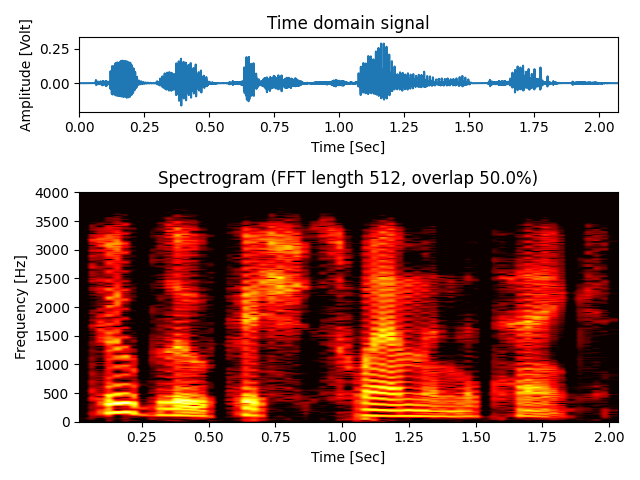

The size of the spectrogram is 257X63


In [5]:
plot_spectrogram(signal, 512, 0.5, Fs)

## Question 1 - E

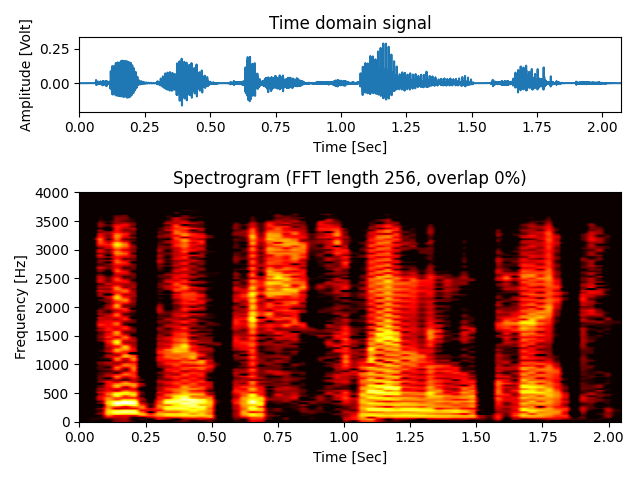

The size of the spectrogram is 129X64


In [6]:
plot_spectrogram(signal, 256, 0, Fs)

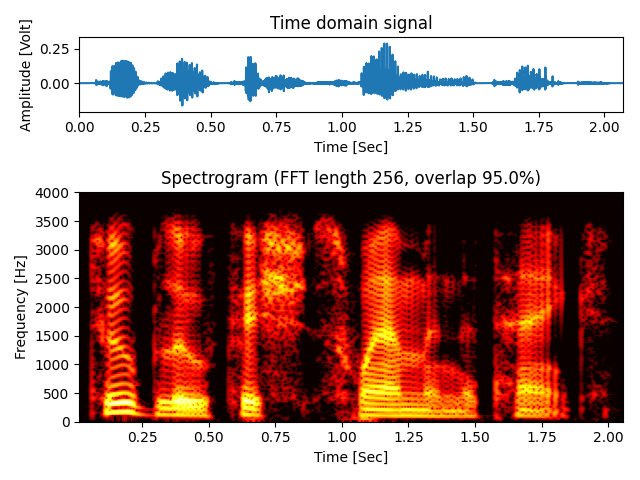

The size of the spectrogram is 129X1256


In [7]:
plot_spectrogram(signal, 256, 0.95, Fs)

************************************************************

## Question 12

In [8]:
def residual_energy(signal: np.ndarray, FIR_coeffs: np.ndarray) -> float:
    error = lfilter(FIR_coeffs, 1, signal)
    return np.mean(error**2)

************************************************************

## Question 13C

Complete the missing code in the function

In [9]:
def generate_impulse_train_frame(frame_len: int, pitch_period: int, reminder_from_last_frame: int) -> (np.ndarray, int):
    first_sample_index_current_frame = (pitch_period - reminder_from_last_frame) % pitch_period
    frame = np.zeros(frame_len)
    for i in np.arange(first_sample_index_current_frame,frame_len,pitch_period):
        frame[i] = 1
    reminder = frame_len - i
    return frame, reminder

## Question 13D

Use the function above to create an impulse train from consecutive segments, and present it in a graph.

Text(0.5, 1.0, 'Concatenated segments')

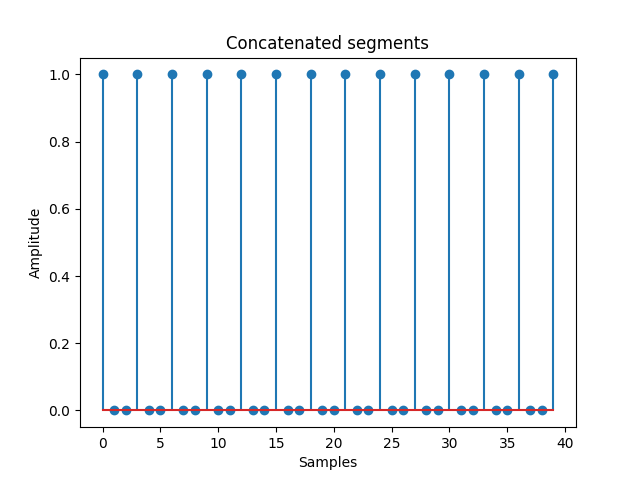

In [10]:
N = 10 #segment length
P = 3 #period length
seg1, rem1 = generate_impulse_train_frame(N, P, 0)
seg2, rem2 = generate_impulse_train_frame(N, P, rem1)
seg3, rem3 = generate_impulse_train_frame(N, P, rem2)
seg4, rem4 = generate_impulse_train_frame(N, P, rem3)
segments = np.concatenate([seg1, seg2, seg3, seg4])

fig = plt.figure()
plt.stem(np.arange(0,4*N),segments)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Concatenated segments')